In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

RERUN = False

In [2]:
df = pd.read_csv("heart.csv")


In [3]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.dtypes


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Scale Numerical features (Z-scroing)

In [6]:
numeric_df = df.select_dtypes(np.number)
scaled_features = StandardScaler().fit_transform(numeric_df.values)
scaled_df = pd.DataFrame(scaled_features, columns=numeric_df.columns)


## Create dummy variables for categorical features

In [7]:
cat_df = df.select_dtypes(exclude=np.number)
dummy_df = pd.get_dummies(
    cat_df, drop_first=True
)  # Drop first dummy variable as a base


In [8]:
features = pd.concat([scaled_df, dummy_df], axis=1)
features["HeartDisease"] = df[
    "HeartDisease"
]  # Undo standard scaling for target variable


In [9]:
features.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,-7.304735e-17,1.084221e-16,-6.482953e-16,-1.009843e-15,4.370747e-16,-2.024524e-16,0.553377,0.789760,0.188453,0.221133,0.050109,0.601307,0.193900,0.404139,0.501089,0.430283
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,0.497414,0.407701,0.391287,0.415236,0.218289,0.489896,0.395567,0.490992,0.500271,0.495386
min,-2.706015e+00,-7.154995e+00,-1.818435e+00,-5.513413e-01,-3.018469e+00,-3.271482e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.906294e-01,-6.699346e-01,-2.337038e-01,-5.513413e-01,-6.605778e-01,-8.324324e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.188098e-02,-1.295128e-01,2.213632e-01,-5.513413e-01,4.678968e-02,-2.695748e-01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,6.883185e-01,4.109089e-01,6.238346e-01,-5.513413e-01,7.541571e-01,5.747115e-01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2.491558e+00,3.653439e+00,3.697252e+00,1.813758e+00,2.561874e+00,4.983762e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
x = features.drop(columns=["HeartDisease"])
y = features["HeartDisease"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


# KNN

C:\Users\nileb\anaconda3\envs\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

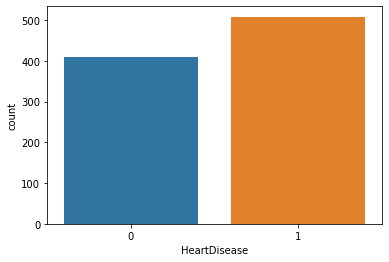

In [11]:
sns.countplot(features["HeartDisease"])


In [12]:
# KNN Classifier object
knn = KNeighborsClassifier()
# Hyperparameters
hyper_params = dict(n_neighbors=list(range(1, 100)))


In [13]:
# Grid Search Cross-validation
if RERUN:
    clf = GridSearchCV(knn, param_grid=hyper_params, scoring="recall", cv=10, n_jobs=-1)
    best_model = clf.fit(x_train, y_train)
    print("Best n_neighbors:", best_model.best_estimator_.get_params()["n_neighbors"])


Best n_neighbors: 15


In [14]:
best_param = {"n_neighbors": 15}
clf = KNeighborsClassifier(**best_param).fit(x_train, y_train)
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       109
           1       0.90      0.89      0.89       167

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



# Logistic Regression

In [16]:
# Logistic Regression object
lr = LogisticRegression()

# Hyperparameters
solvers = ["liblinear"]
penalty = ["l2", "l1"]
c = np.arange(0.01, 100, 0.1).tolist()

# Hyperparameter space
hyper_params = dict(penalty=penalty, C=c, solver=solvers, random_state=[1])


In [17]:
# Grid Search Cross-validation
if RERUN:
    clf = GridSearchCV(
        lr, param_grid=hyper_params, scoring="recall", cv=10, n_jobs=-1
    )
    best_model = clf.fit(x_train, y_train)
    print(f"Best Hyperparameters: {best_model.best_params_}")


Best Hyperparameters: {'C': 0.31000000000000005, 'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear'}


In [18]:
best_param = {'C': 0.31000000000000005, 'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear'}
clf = LogisticRegression(**best_param).fit(x_train, y_train)
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       109
           1       0.92      0.88      0.90       167

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



# Decision Tree Classifier

In [21]:
dt = DecisionTreeClassifier()

# Hyperparameters
criterion = ["gini", "entropy"]
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1, x_train.shape[1]))

# Hyperparameter space
hyper_params = dict(
    criterion=criterion,
    max_depth=max_depths,
    min_samples_leaf=min_samples_leafs,
    min_samples_split=min_samples_splits,
    max_features=max_features,
)

In [30]:
# Random Search Cross-validation, it yields the same result as GridSearch CV but with much better efficiency
if RERUN:
    clf = RandomizedSearchCV(dt, n_iter=1000, random_state=1,
                            param_distributions =hyper_params, scoring="recall", cv=10, n_jobs=-1)
    best_model = clf.fit(x_train, y_train)
    print(f"Best Hyperparameters: {best_model.best_params_}")

In [31]:
best_param = {'min_samples_split': 0.6, 'min_samples_leaf': 0.5, 'max_features': 3, 'max_depth': 8.0, 'criterion': 'gini'}
clf = DecisionTreeClassifier(**best_param).fit(x_train, y_train)
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.61      1.00      0.75       167

    accuracy                           0.61       276
   macro avg       0.30      0.50      0.38       276
weighted avg       0.37      0.61      0.46       276



C:\Users\nileb\anaconda3\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nileb\anaconda3\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nileb\anaconda3\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classifier

In [ ]:
# %%
rf = RandomForestClassifier()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=0, stop=2000, num=100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 120, num=10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 5, 15]
# Method of selecting samples for training each tree
bootstrap = [True, False]

hyper_params = dict(
    n_estimators=n_estimators,
    max_features=max_features,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    bootstrap=bootstrap,
)


In [ ]:
if RERUN:
    clf = RandomizedSearchCV(rf, n_iter=100, random_state=1,
                            param_distributions =hyper_params, scoring="recall", cv=10, n_jobs=-1)
    best_model = clf.fit(x_train, y_train)
    print(f"Best Hyperparameters: {best_model.best_params_}")

In [ ]:
# Best parameter based on Randomised Hyperparameter CV search
best_param = {'n_estimators': 1232, 'min_samples_split': 50, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': True}
clf = RandomForestClassifier(**best_param).fit(x_train, y_train)
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))